<a href="https://colab.research.google.com/github/mossytreesandferns/DataCampHomework/blob/master/DCIntroImportingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
#Change working directory to make it easier to access the files
import os
os.chdir("/content/gdrive/My Drive/DCImportingData/")
os.getcwd()

'/content/gdrive/My Drive/DCImportingData'

# Introduction to Flat Files

In [3]:
! ls

battledeath.xlsx    L-L1_LOSC_4_V1-1126259446-32.hdf5.txt  seaslug.txt
Chinook.sqlite.txt  mnist_kaggle_some_rows.csv		   titanic_sub.csv
disarea.dta.txt     mobydick.txt
ja_data2.mat.txt    sales.sas7bdat.txt


In [0]:
filename = 'mobydick.txt'
file = open(filename, mode='r')
text = file.read()
file.close()
#print(text)

In [5]:
print(file.closed)

True


In [6]:
with open('mobydick.txt', mode='r') as file:
  print(file.readline())
  print(file.readline())
  print(file.readline())

The Project Gutenberg EBook of Moby Dick; or The Whale, by Herman Melville



This eBook is for the use of anyone anywhere at no cost and with



In [7]:
with open('mobydick.txt', mode='r') as file:
  #line = file.readline()
  for i in range(10):
    print(file.readline())
    #print(line) DIDN'T WORK
#file.close() don't need to close when using a context manager

The Project Gutenberg EBook of Moby Dick; or The Whale, by Herman Melville



This eBook is for the use of anyone anywhere at no cost and with

almost no restrictions whatsoever.  You may copy it, give it away or

re-use it under the terms of the Project Gutenberg License included

with this eBook or online at www.gutenberg.org





Title: Moby Dick; or The Whale





### Importing flat files with numpy

In [0]:
import numpy as np

In [0]:
# loadtxt(), genfromtxt()
filename = 'mnist_kaggle_some_rows.csv' # loading a csv as a txt file
data = np.loadtxt(filename, delimiter=',')
data


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [2., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

In [0]:
filename = 'mnist_kaggle_some_rows.csv' # loading a csv as a txt file
data = np.loadtxt(filename, delimiter=',',skiprows=1,usecols=[0,2]) #loadtxt breaks down with mixed data types
#data

In [0]:
print(type(data))

<class 'numpy.ndarray'>


In [0]:
'''importing as string'''
file_name = 'seaslug.txt'
data = np.loadtxt(file_name, delimiter='\t', dtype=str)
print(data[0:10])

[['Time' 'Percent']
 ['99' '0.067']
 ['99' '0.133']
 ['99' '0.067']
 ['99' '0']
 ['99' '0']
 ['0' '0.5']
 ['0' '0.467']
 ['0' '0.857']
 ['0' '0.5']]


In [0]:
'''importing as floats with the top row headers as string: ValueError'''
file_name = 'seaslug.txt'
data = np.loadtxt(file_name, delimiter='\t', dtype=float)
print(data[0:10])

ValueError: ignored

In [0]:
'''importing data as float using skiprows=1'''
file_name = 'seaslug.txt'
data = np.loadtxt(file_name, delimiter='\t', skiprows=1, dtype=float)
print(data[0:10])

[[9.90e+01 6.70e-02]
 [9.90e+01 1.33e-01]
 [9.90e+01 6.70e-02]
 [9.90e+01 0.00e+00]
 [9.90e+01 0.00e+00]
 [0.00e+00 5.00e-01]
 [0.00e+00 4.67e-01]
 [0.00e+00 8.57e-01]
 [0.00e+00 5.00e-01]
 [0.00e+00 3.57e-01]]


In [0]:
print(data[9])

[0.    0.357]


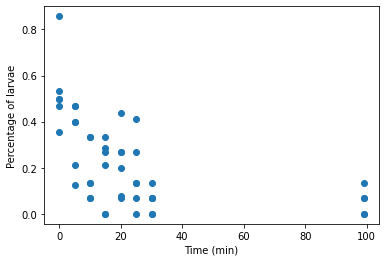

In [0]:
import matplotlib.pyplot as plt

plt.scatter(x=data[:,0],y=data[:,1])
plt.xlabel('Time (min)')
plt.ylabel('Percentage of larvae')
plt.show()

In [0]:
'''Using np.genfromtxt()'''
data = np.genfromtxt('titanic_sub.csv',delimiter=',', names=True, dtype=None)
data[:3]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


array([(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S'),
       (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C'),
       (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')],
      dtype=[('PassengerId', '<i8'), ('Survived', '<i8'), ('Pclass', '<i8'), ('Sex', 'S6'), ('Age', '<f8'), ('SibSp', '<i8'), ('Parch', '<i8'), ('Ticket', 'S18'), ('Fare', '<f8'), ('Cabin', 'S15'), ('Embarked', 'S1')])

In [0]:
'''Using np.recfromcsv()'''
data = np.recfromcsv('titanic_sub.csv')
data[:3]

/usr/local/lib/python3.6/dist-packages/numpy/lib/npyio.py:2372: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


rec.array([(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S'),
           (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C'),
           (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')],
          dtype=[('passengerid', '<i8'), ('survived', '<i8'), ('pclass', '<i8'), ('sex', 'S6'), ('age', '<f8'), ('sibsp', '<i8'), ('parch', '<i8'), ('ticket', 'S18'), ('fare', '<f8'), ('cabin', 'S15'), ('embarked', 'S1')])

### Importing Flat Files Using Pandas

In [8]:
import pandas as pd
file = 'titanic_sub.csv'
data = pd.read_csv(file)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
file = 'mnist_kaggle_some_rows.csv'
data = pd.read_csv(file, header=None, nrows=5)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
import numpy as np
data_array = np.array(data)
data_array

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
type(data_array)

numpy.ndarray

In [29]:
'''Customizing Import'''
file = 'titanic_sub.csv' # file I found on github copied into an rtf, had to conver to csv
data = pd.read_csv(file)# sep='\t',na_values='Nothing',comment='#',error_bad_lines=False, didn't need to use these, csv file only had two columns
data.head() # look for values to convert to NaN, remember error_bad_lines = False, sep = '\t', comment= '#'

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


# Importing Data From Other File Types

### Pickle and SOS

In [33]:
'''Using the os module'''
import os
wd = os.getcwd()
os.listdir(wd)

['titanic_sub.csv',
 'battledeath.xlsx',
 'sales.sas7bdat.txt',
 'seaslug.txt',
 'mnist_kaggle_some_rows.csv',
 'disarea.dta.txt',
 'L-L1_LOSC_4_V1-1126259446-32.hdf5.txt',
 'ja_data2.mat.txt',
 'Chinook.sqlite.txt',
 'mobydick.txt',
 'titanic_corrupt.rtf',
 'titanic_corrupt.csv',
 'walmart_sales.pkl']

In [35]:
'''Using the pickle module'''
import pickle
with open('walmart_sales.pkl', 'rb') as file:
  data = pickle.load(file)
print(data)

        store type  ...  fuel_price_usd_per_l unemployment
0           1    A  ...              0.679451        8.106
1           1    A  ...              0.679451        8.106
2           1    A  ...              0.679451        8.106
3           1    A  ...              0.679451        8.106
4           1    A  ...              0.679451        8.106
...       ...  ...  ...                   ...          ...
413114     45    B  ...              1.025516        8.667
413115     45    B  ...              1.025516        8.667
413116     45    B  ...              1.025516        8.667
413117     45    B  ...              1.025516        8.667
413118     45    B  ...              1.025516        8.667

[413119 rows x 9 columns]


In [36]:
type(data)

pandas.core.frame.DataFrame

In [49]:
'''Reading in Excel Files'''
file = 'battledeath.xlsx'
data = pd.ExcelFile(file)
data.sheet_names

['2002', '2004']

In [50]:
'''Only one sheet shows up using only read_excel'''
# file = 'battledeath.xlsx'
# data = pd.read_excel(file)
# data.head()

'Only one sheet shows up using only read_excel'

In [52]:
df1 = data.parse('2002')
df1.head()

,"War, age-adjusted mortality due to",2002
0,Afghanistan,36.083990
1,Albania,0.128908
2,Algeria,18.314120
3,Andorra,0.000000
4,Angola,18.964560


In [53]:
df2 = data.parse(0)
df2.head()

,"War, age-adjusted mortality due to",2002
0,Afghanistan,36.083990
1,Albania,0.128908
2,Algeria,18.314120
3,Andorra,0.000000
4,Angola,18.964560


In [54]:
df3= data.parse(1)
df3.head()

,War(country),2004
0,Afghanistan,9.451028
1,Albania,0.130354
2,Algeria,3.407277
3,Andorra,0.000000
4,Angola,2.597931


In [55]:
'''Using skiprows= and names='''
df1 = data.parse(0,skiprows=[0],names=['Names','AAM due to War (2002)'])
df1.head()

,Names,AAM due to War (2002)
0,Albania,0.128908
1,Algeria,18.314120
2,Andorra,0.000000
3,Angola,18.964560
4,Antigua and Barbuda,0.000000


In [59]:
df2 = data.parse(1,usecols=[0],skiprows=[0],names=['Country'])
df2.head()

,Country
0,Albania
1,Algeria
2,Andorra
3,Angola
4,Antigua and Barbuda


### SAS and Stata

In [64]:
''' SAS files'''
# .SAS7bDAT, .SAS7bCAT
! pip install sas7bdat

  Created wheel for sas7bdat: filename=sas7bdat-2.2.3-cp36-none-any.whl size=16295 sha256=ffc0587c32dfc717b712941c93324b39605fda0bac56da694ddc7100e25670f1
  Stored in directory: /root/.cache/pip/wheels/e0/b0/d2/5d251f0c159a251ec247d9d7f6db889b2c396b2f247a64e5c4
Successfully built sas7bdat


In [0]:
from sas7bdat import SAS7BDAT
with SAS7BDAT('sales.sas7bdat.txt') as file:
  df_sas = file.to_data_frame()

In [67]:
df_sas.head()

,YEAR,P,S
0,1950.0,12.9,181.899994
1,1951.0,11.9,245.000000
2,1952.0,10.7,250.199997
3,1953.0,11.3,265.899994
4,1954.0,11.2,248.500000


In [88]:
'''dta (stata) files'''
# http://www.principlesofeconometrics.com/stata.htm
import pandas as pd
data = pd.read_stata('oscar.dta')
data.head(10)

,year,title,winner,nominations,gglobes,comedy
0,1984.0,A Soldier's Story,0.0,3.0,0.0,0.0
1,1984.0,Places in the Heart,0.0,7.0,1.0,0.0
2,1984.0,The Killing Fields,0.0,7.0,1.0,0.0
3,1984.0,A Passage to India,0.0,11.0,3.0,0.0
4,1984.0,Amadeus,1.0,11.0,4.0,0.0
5,1985.0,Prizzi's Honor,0.0,8.0,4.0,1.0
6,1985.0,Kiss of the Spider Woman,0.0,4.0,0.0,0.0
7,1985.0,Witness,0.0,8.0,0.0,0.0
8,1985.0,The Color Purple,0.0,11.0,1.0,0.0
9,1985.0,Out of Africa,1.0,11.0,3.0,0.0


In [0]:
# x=os.getcwd()
# os.listdir(x)

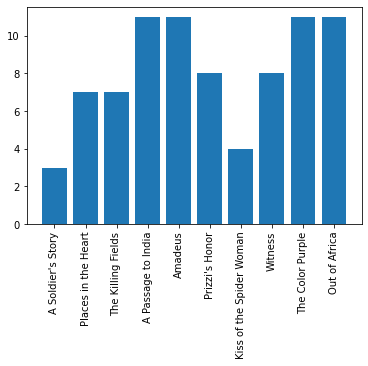

In [89]:
noms = data[['title','nominations']].iloc[0:10]
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(noms['title'],noms['nominations'])
ax.set_xticklabels(labels=noms['title'],rotation=90)
plt.show()

### Importing HDF5 Files

In [0]:
# x = os.getcwd()
# os.listdir(x)

In [94]:
'''HDF5 current standard for storing large amounts of numerical data'''
import h5py
filename = 'L-L1_LOSC_4_V1-931069952-4096.hdf5'
data = h5py.File(filename, 'r')
print(type(data))

<class 'h5py._hl.files.File'>


In [96]:
for key in data.keys():
  print(key)

meta
quality
strain


In [97]:
for key in data['meta']:
  print(key)

Description
DescriptionURL
Detector
Duration
GPSstart
Observatory
Type
UTCstart


In [99]:
for key in data['quality']:
  print(key)

detail
injections
simple


In [100]:
for key in data['strain']:
  print(key)

Strain


In [106]:
data['meta']['Duration'].value

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


4096

In [0]:
#data['meta']['Description'].value

In [116]:
strain = data['strain']['Strain'].value
strain

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


array([           nan,            nan,            nan, ...,
       2.68965991e-17, 2.79607952e-17, 2.90255572e-17])

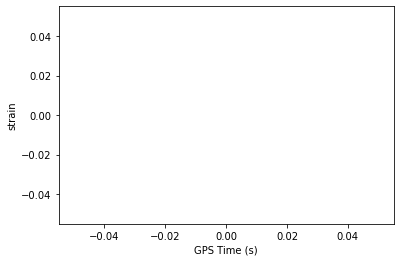

In [118]:
num_samples = 10000
time = np.arange(0, 1, 1/num_samples)
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

### Importing MATLAB files

In [0]:
import scipy.io
filename = 'ja_data2.mat.txt'
mat = scipy.io.loadmat(filename)

In [120]:
mat

{'CYratioCyt': array([[0.        , 1.53071547, 1.54297013, ..., 1.34990123, 1.35329984,
         1.34922173],
        [0.        , 1.28605578, 1.29385656, ..., 1.31307311, 1.30039694,
         1.30563938],
        [0.        , 1.32731222, 1.32884617, ..., 1.24887565, 1.24506205,
         1.25825831],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 1.44552606, 1.42862357, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 1.45794466, 0.        , ..., 1.1229479 , 1.12224652,
         1.1486481 ]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Nov 24 17:35:19 2015',
 '__version__': '1.0',
 'cfpCyt': array([[   0.        , 1519.37866667, 1518.73045822, ..., 1354.96132597,
         1352.75966851, 1367.18681319],
        [   0.        , 1175.74007937, 1176.164     , ..., 1098.57984791,
         1109.05893186, 1111.66847826],
        [   0.    

In [121]:
type(mat)

dict

In [122]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])

In [123]:
mat['__header__']

b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Nov 24 17:35:19 2015'

In [124]:
mat['__globals__']

[]

In [125]:
mat['rfpCyt']

array([[  0.        , 238.62933333, 238.62264151, ..., 250.17403315,
        249.05801105, 251.3489011 ],
       [  0.        , 291.7718254 , 292.006     , ..., 269.99239544,
        271.32044199, 271.26086957],
       [  0.        , 252.45212766, 253.34851138, ..., 225.76428571,
        224.02909091, 226.38103757],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 373.45756458, 377.05420561, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 415.25079365,   0.        , ..., 407.76514032,
        402.54331865, 409.40528634]])

In [0]:
import scipy.io
import numpy as np
filename = 'data1.mat'
mat = scipy.io.loadmat(filename)

In [127]:
type(mat)

dict

In [129]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'fret', 'rfp'])

In [130]:
mat['fret']

array([[0.        , 0.        , 0.        , ..., 0.63444499, 0.64521205,
        0.64302332],
       [0.        , 0.        , 0.        , ..., 0.59611929, 0.60171088,
        0.59868451],
       [0.        , 0.        , 0.        , ..., 0.72522822, 0.74362067,
        0.73933919],
       ...,
       [0.        , 0.        , 0.        , ..., 0.69681655, 0.67885274,
        0.70031342],
       [0.        , 0.        , 0.        , ..., 0.75400259, 0.73390885,
        0.74981491],
       [0.        , 0.        , 0.        , ..., 0.69681655, 0.67885274,
        0.70031342]])

In [131]:
type(mat['fret'])

numpy.ndarray

In [136]:
mat['fret'].shape

(324, 410)

# Working with Relational Databases

### Creating a Database Engine

In [0]:
'''SQLAlchemy works with SQLite, Postgres, and MySQL'''
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Chinook.sqlite.txt')

In [144]:
table_names = engine.table_names()
table_names

['Album',
 'Artist',
 'Customer',
 'Employee',
 'Genre',
 'Invoice',
 'InvoiceLine',
 'MediaType',
 'Playlist',
 'PlaylistTrack',
 'Track']

### Querying databases

In [147]:
table_names

['Album',
 'Artist',
 'Customer',
 'Employee',
 'Genre',
 'Invoice',
 'InvoiceLine',
 'MediaType',
 'Playlist',
 'PlaylistTrack',
 'Track']

In [0]:
''' Workflow'''
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Chinook.sqlite.txt')
con = engine.connect()
rs = con.execute('select * from Album')
df = pd.DataFrame(rs.fetchall())
df.columns = rs.keys()
con.close()

In [150]:
df.head()

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


In [0]:
'''Using a context manager'''
with engine.connect() as con:
  rs = con.execute('select AlbumId, Title from Album')
  df = pd.DataFrame(rs.fetchmany(size=5))
  df.columns = rs.keys()

In [156]:
df

,AlbumId,Title
0,1,For Those About To Rock We Salute You
1,2,Balls to the Wall
2,3,Restless and Wild
3,4,Let There Be Rock
4,5,Big Ones


In [0]:
'''Using WHERE'''
with engine.connect() as con:
  rs = con.execute('select * from Album where AlbumId > 5')
  df = pd.DataFrame(rs.fetchmany(size=5))
  df.columns = rs.keys()

In [158]:
df.head()

,AlbumId,Title,ArtistId
0,6,Jagged Little Pill,4
1,7,Facelift,5
2,8,Warner 25 Anos,6
3,9,Plays Metallica By Four Cellos,7
4,10,Audioslave,8


In [159]:
'''Using Order By and SQLAlchemy'''
with engine.connect() as con:
  rs = con.execute('select * from Album order by ArtistId')
  df = pd.DataFrame(rs.fetchmany(size=5))
  df.columns = rs.keys()
df.head()  

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,4,Let There Be Rock,1
2,2,Balls to the Wall,2
3,3,Restless and Wild,2
4,5,Big Ones,3


### Querying Relational Databases With Only Pandas

In [165]:
'''Panda command as query'''
import pandas as pd
engine = create_engine('sqlite:///Chinook.sqlite.txt')
query = pd.read_sql_query('select * from Album', engine)
query.head()

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


In [166]:
query = pd.read_sql_query('select * from Album order by ArtistId', engine)
query.head()

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,4,Let There Be Rock,1
2,2,Balls to the Wall,2
3,3,Restless and Wild,2
4,5,Big Ones,3


### Advanced Querying: Inner Joins

In [167]:
engine = create_engine('sqlite:///Chinook.sqlite.txt')
engine.table_names()

['Album',
 'Artist',
 'Customer',
 'Employee',
 'Genre',
 'Invoice',
 'InvoiceLine',
 'MediaType',
 'Playlist',
 'PlaylistTrack',
 'Track']

In [169]:
query = pd.read_sql_query('select * from Track', engine)
query.head()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [170]:
query = pd.read_sql_query('select * from Genre', engine)
query.head()

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


In [171]:
query = pd.read_sql_query('select * from Track inner join Genre on Track.GenreId = Genre.GenreId', engine)
query.head()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice,GenreId,Name
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,1,Rock
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99,1,Rock
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99,1,Rock
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99,1,Rock
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99,1,Rock
